In [1]:
# monitor training performance

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('P:/Can Delete/pima-indians-diabetes.csv', delimiter=",")
dataset


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
# default is 100 trees
# verbose is to compress the message printing out 
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set,verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
# result gives all the evaluation error for all the 100 trees(the evaluation error is only on test dataset)
results = model.evals_result()
print(results)

{'validation_0': {'error': [0.259843, 0.26378, 0.26378, 0.255906, 0.255906, 0.26378, 0.23622, 0.255906, 0.248031, 0.248031, 0.248031, 0.232283, 0.228346, 0.228346, 0.228346, 0.228346, 0.228346, 0.228346, 0.224409, 0.232283, 0.232283, 0.23622, 0.23622, 0.232283, 0.228346, 0.228346, 0.224409, 0.224409, 0.228346, 0.232283, 0.228346, 0.224409, 0.224409, 0.228346, 0.228346, 0.224409, 0.228346, 0.224409, 0.216535, 0.220472, 0.216535, 0.216535, 0.216535, 0.216535, 0.212598, 0.224409, 0.224409, 0.220472, 0.224409, 0.232283, 0.228346, 0.224409, 0.224409, 0.232283, 0.228346, 0.228346, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.224409, 0.220472, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.216535, 0.212598, 0.212598, 0.212598, 0.212598, 0.212598, 0.208661, 0.204724, 0.212598, 0.212598, 0.212598, 0.204724, 0.208661, 0.208661, 0.208661, 0.208661, 0.208661, 0.212598, 0.204724, 0.212598

In [9]:
# make evalueation error on both training and test dataset
model = XGBClassifier()
eval_set =  [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set,verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# validation_0 is on training dataset, validation_1 is on test dataset
result = model.evals_result()
result


[0]	validation_0-error:0.22179	validation_1-error:0.259843
[1]	validation_0-error:0.202335	validation_1-error:0.26378
[2]	validation_0-error:0.196498	validation_1-error:0.26378
[3]	validation_0-error:0.200389	validation_1-error:0.255906
[4]	validation_0-error:0.202335	validation_1-error:0.255906
[5]	validation_0-error:0.202335	validation_1-error:0.26378
[6]	validation_0-error:0.194553	validation_1-error:0.23622
[7]	validation_0-error:0.200389	validation_1-error:0.255906
[8]	validation_0-error:0.194553	validation_1-error:0.248031
[9]	validation_0-error:0.188716	validation_1-error:0.248031
[10]	validation_0-error:0.184825	validation_1-error:0.248031
[11]	validation_0-error:0.180934	validation_1-error:0.232283
[12]	validation_0-error:0.177043	validation_1-error:0.228346
[13]	validation_0-error:0.178988	validation_1-error:0.228346
[14]	validation_0-error:0.177043	validation_1-error:0.228346
[15]	validation_0-error:0.175097	validation_1-error:0.228346
[16]	validation_0-error:0.173152	valida

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{'validation_0': {'error': [0.22179,
   0.202335,
   0.196498,
   0.200389,
   0.202335,
   0.202335,
   0.194553,
   0.200389,
   0.194553,
   0.188716,
   0.184825,
   0.180934,
   0.177043,
   0.178988,
   0.177043,
   0.175097,
   0.173152,
   0.173152,
   0.173152,
   0.173152,
   0.167315,
   0.169261,
   0.171206,
   0.173152,
   0.177043,
   0.173152,
   0.177043,
   0.177043,
   0.177043,
   0.175097,
   0.175097,
   0.177043,
   0.178988,
   0.175097,
   0.171206,
   0.16537,
   0.177043,
   0.163424,
   0.169261,
   0.167315,
   0.16537,
   0.167315,
   0.159533,
   0.155642,
   0.151751,
   0.149805,
   0.145914,
   0.143969,
   0.143969,
   0.142023,
   0.136187,
   0.138132,
   0.138132,
   0.138132,
   0.132296,
   0.136187,
   0.134241,
   0.13035,
   0.13035,
   0.13035,
   0.128405,
   0.128405,
   0.126459,
   0.126459,
   0.126459,
   0.126459,
   0.122568,
   0.122568,
   0.118677,
   0.120623,
   0.120623,
   0.122568,
   0.120623,
   0.120623,
   0.118677,
   0.1

[0]	validation_0-error:0.22179	validation_0-logloss:0.655154	validation_1-error:0.259843	validation_1-logloss:0.660186
[1]	validation_0-error:0.202335	validation_0-logloss:0.623321	validation_1-error:0.26378	validation_1-logloss:0.634854
[2]	validation_0-error:0.196498	validation_0-logloss:0.596815	validation_1-error:0.26378	validation_1-logloss:0.612239
[3]	validation_0-error:0.200389	validation_0-logloss:0.574026	validation_1-error:0.255906	validation_1-logloss:0.593118
[4]	validation_0-error:0.202335	validation_0-logloss:0.553853	validation_1-error:0.255906	validation_1-logloss:0.578303
[5]	validation_0-error:0.202335	validation_0-logloss:0.536789	validation_1-error:0.26378	validation_1-logloss:0.564942
[6]	validation_0-error:0.194553	validation_0-logloss:0.521477	validation_1-error:0.23622	validation_1-logloss:0.555113
[7]	validation_0-error:0.200389	validation_0-logloss:0.507801	validation_1-error:0.255906	validation_1-logloss:0.54499
[8]	validation_0-error:0.194553	validation_0-l

[68]	validation_0-error:0.118677	validation_0-logloss:0.302821	validation_1-error:0.216535	validation_1-logloss:0.503108
[69]	validation_0-error:0.120623	validation_0-logloss:0.30198	validation_1-error:0.216535	validation_1-logloss:0.502673
[70]	validation_0-error:0.120623	validation_0-logloss:0.29991	validation_1-error:0.216535	validation_1-logloss:0.502662
[71]	validation_0-error:0.122568	validation_0-logloss:0.298055	validation_1-error:0.216535	validation_1-logloss:0.50343
[72]	validation_0-error:0.120623	validation_0-logloss:0.296987	validation_1-error:0.216535	validation_1-logloss:0.504037
[73]	validation_0-error:0.120623	validation_0-logloss:0.295123	validation_1-error:0.216535	validation_1-logloss:0.504439
[74]	validation_0-error:0.118677	validation_0-logloss:0.294368	validation_1-error:0.216535	validation_1-logloss:0.503697
[75]	validation_0-error:0.118677	validation_0-logloss:0.293513	validation_1-error:0.216535	validation_1-logloss:0.504477
[76]	validation_0-error:0.116732	va

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


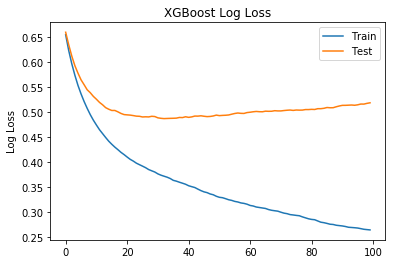

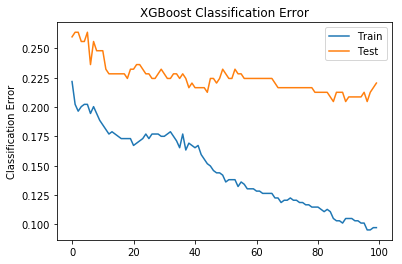

In [13]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = loadtxt('P:/Can Delete/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [15]:

# early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('P:/Can Delete/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
# if the model performance dont improve after 10 iterations, then the training process stops
# the best iteration is the stopped iterations - 10
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
